# Bank Assets Open Data

This assignment is based on the bank assets open dataset from the _Reserve Bank of Australia_. This dataset shows the assets of banks in Australia in every business sector (including deposit, mortgage, commercial loans and foreign currency assets). The bank assets dataset is not only showing the wealth of the banks, but most importantly, it is indicating the investment structure of the Australian people.

More details in [Australia Government](https://data.gov.au/dataset/ds-dga-5cd61e22-4c40-402e-a461-97c4d68e70de/details)

## Import the Essential Tools and Set Plotting Properties

In [2]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7.5)

## Read the Dataset with Pandas

In [4]:
# Open the dataset in the hard drive if it exists, download it otherwise
if os.path.isfile("Bank Assets.xls"):
    filepath = "Bank Assets.xls"
    print("loading from file")
else:
    filepath = "https://data.gov.au/data/storage/f/2013-05-12T200151/tmpKzfDseb02hist.xls"
    print("loading from the internet")

# Name the columns of the dataset
column_names=['Time', 'Resident assets – notes and coins and deposits due from RBA', 'Resident assets – bills receivables', 'Resident assets – loans and advances – residential', 'Resident assets – loans and advances – personal', 'Resident assets – loans and advances – commercial',
       'Resident assets – other assets', 'Resident assets – total', 'Resident assets – denominated in foreign currency', 'Non-resident assets – total', 'Non-resident assets – denominated in foreign currency', 'Amount due from overseas operations',
       'Total assets'] 

# Read the dataset with Pandas, and then rearrange it into a readable manner
# Skip the useless rows and columns
bank_assets_data = pd.read_excel(filepath, index_col=0, parse_date=0, skiprows=10, names=column_names, skipfooter=15)
print("done")

loading from file
done


## Call out the Dataset

In [5]:
bank_assets_data

,Resident assets – notes and coins and deposits due from RBA,Resident assets – bills receivables,Resident assets – loans and advances – residential,Resident assets – loans and advances – personal,Resident assets – loans and advances – commercial,Resident assets – other assets,Resident assets – total,Resident assets – denominated in foreign currency,Non-resident assets – total,Non-resident assets – denominated in foreign currency,Amount due from overseas operations,Total assets
Time,,,,,,,,,,,,
1975-01-31,1787.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30257.000
1975-02-28,1795.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30824.000
1975-03-31,1834.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31277.000
1975-04-30,1923.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31722.000
1975-05-31,1664.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31464.000
1975-06-30,1660.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31620.000
1975-07-31,1751.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32106.000
1975-08-31,1832.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32600.000
1975-09-30,2088.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33165.000


## Plot All the Data 

<function matplotlib.pyplot.show(*args, **kw)>

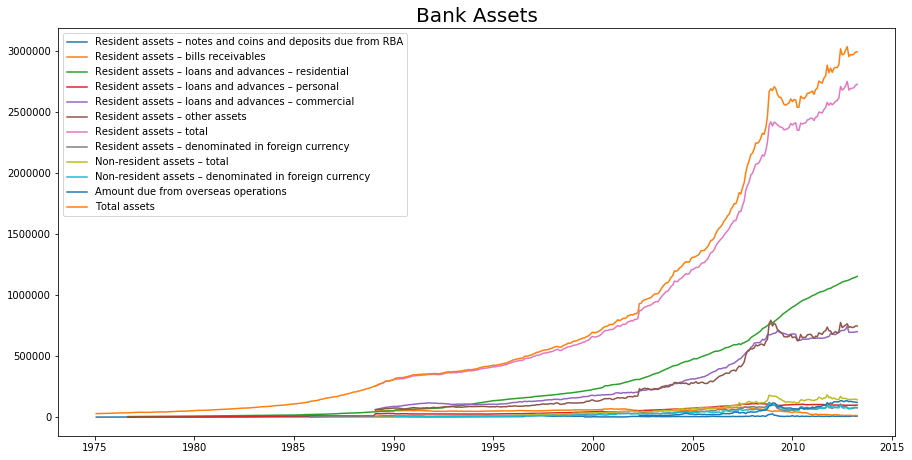

In [7]:
plt.plot(bank_assets_data)
plt.title("Bank Assets", fontsize=20)
plt.legend(bank_assets_data.columns, fontsize = 10)
plt.show

## Plot the Total Assets

Plot the data of 'Total assets' only to see the overall trending of Australian economy

<function matplotlib.pyplot.show(*args, **kw)>

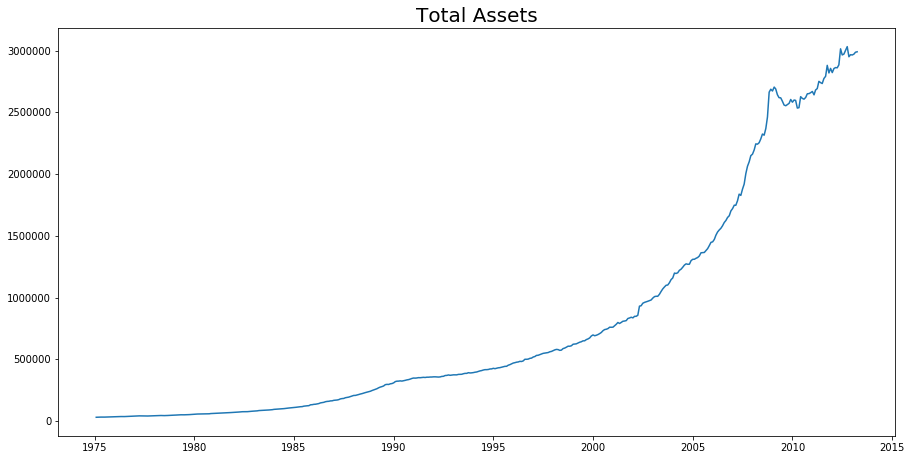

In [8]:
plt.plot(bank_assets_data["Total assets"])
plt.title("Total Assets", fontsize=20)
plt.show

From the graph above, we can see the wealth in Australia is rising rapidly in the following years:
[1990, 2003, 2008, 2012]

The rise of wealth in 1990 could due to the economic restoration from the Early 1990s Recession in Australia.

Suprisingly, the 1997 Asian Financial Crisis and 2008 American Subprime Crisis does not skrink the wealth in Australia hugely.

# Monthly Data to Annual Data

We have identified the key years of the Australian economy from the bank total assets graph. And we want to see the change of investment structures of Australian people. Hence, plotting a pie chart is a good option to see the change of the investment structure.

However, some more work need to be done before plotting the pie charts due to the data is recorded monthly in the dataset. Therefore, we need to create a function to get the annual data from taking the mean value of each business sector over the 12 months and we need to exclude the 'total' column

In [9]:
def annual_data(year_number):
    
    # Create an empty dictionary
    Dict={}
    # Exclude the "Date" column
    data_type=column_names[1:13]
    # Locate the row number of the year and get the mean value of it
    record_row_number=(year_number-1975)*12
    year_data = bank_assets_data.iloc[record_row_number:record_row_number+12]
    annual_data=year_data.mean()
    
    # Creating keys in the dictionary and give the corresponding mean value to the key
    for i in range(len(data_type)):
        Dict[data_type[i]]=annual_data[i]
        
    # Create variables in list type to store the data
    column=[]
    values=[]
    # Exclude the "Nan" value and any columns contains "total" and "Total"
    # Then store the valid value with its column name to the corresponding variable
    for i in range(len(data_type)):
        if Dict[data_type[i]]>0 and data_type[i].count("total")==0 and data_type[i].count("Total")==0:
            column.append(data_type[i])
            values.append(Dict[data_type[i]])      
    return column,values

## Investment Structure in 1990

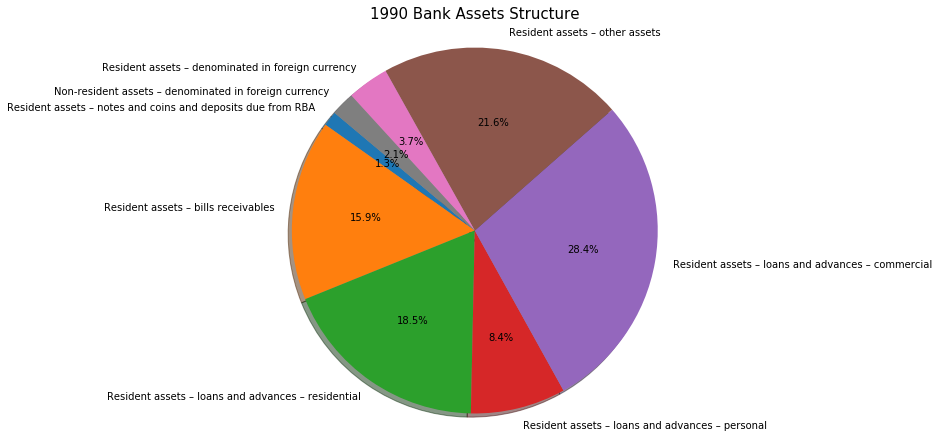

In [10]:
labels,sizes=annual_data(1990)
# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("1990 Bank Assets Structure", fontsize=15)
plt.show()

## Investment Structure in 2003

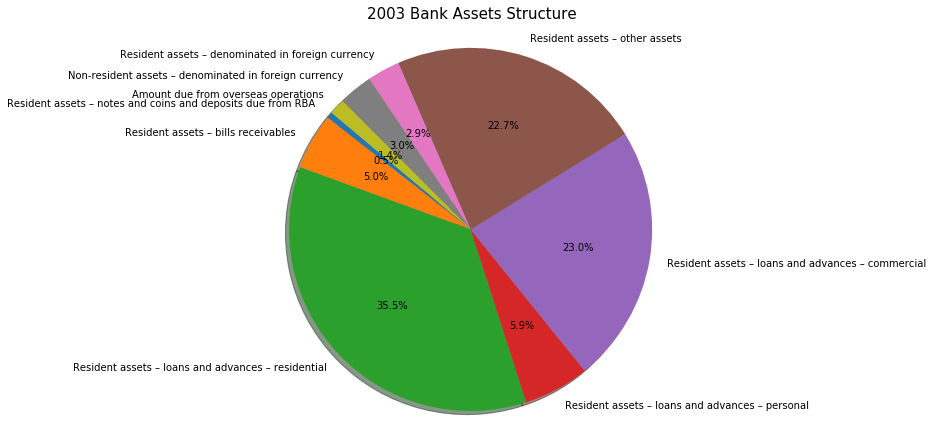

In [11]:
labels,sizes=annual_data(2003)
# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("2003 Bank Assets Structure", fontsize=15)
plt.show()

## Investment Structure in 2008

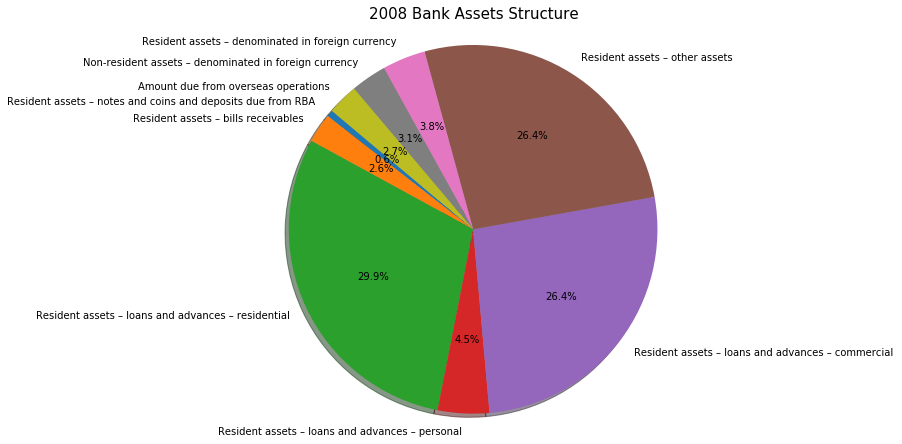

In [12]:
labels,sizes=annual_data(2008)
# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("2008 Bank Assets Structure", fontsize=15)
plt.show()

## Investment Structure in 2012

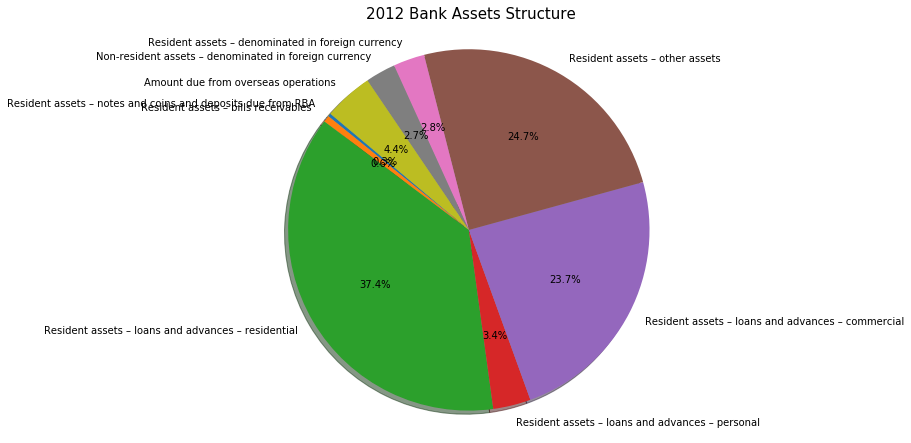

In [13]:
labels,sizes=annual_data(2012)
# Plot
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("2012 Bank Assets Structure", fontsize=15)
plt.show()

## Proportion of the Key Assets among Total Wealth in the History

In the previous charts, we identified that the key changing assets are residential loans, recievable bills and personal loans

Let's plot the proportion of those assets to see the trending.

Before plotting, we need to define two functions to make the plotting process easier

In [14]:
def percentage_data(year_number,column_name):   
# This function is to calculate the proportion of a specific assets among the total assets in a year.
    
    column_value=0
    # get the mean value of the year
    column,values=annual_data(year_number)
    # sum up all the assets to get the total value
    percentage_denominator=sum(values)
    
    # locating the sector which is needed
    for i in range(len(column)):
        if column[i]==column_name:
            column_value=values[i]
            
    # calculate the percentage       
    if column_value==0:
        percentage=0
    else:
        percentage=column_value/percentage_denominator
        
    return percentage

In [15]:
def percentage_among_years(year_start, year_stop ,column_name):
# This function is to get all the proportion of a specific assets among a period.
    
    values=[]
    year_axis=[]
    
    # calling the previous function to get the proportion in each year and record it in lists
    for i in range(year_start,year_stop+1):
        percentage=float(percentage_data(i,column_name))*100
        values.append(percentage)
        year_axis.append(i)

    return values, year_axis

Plot to see the change in proportion of **residential loans** among total wealth

<function matplotlib.pyplot.show(*args, **kw)>

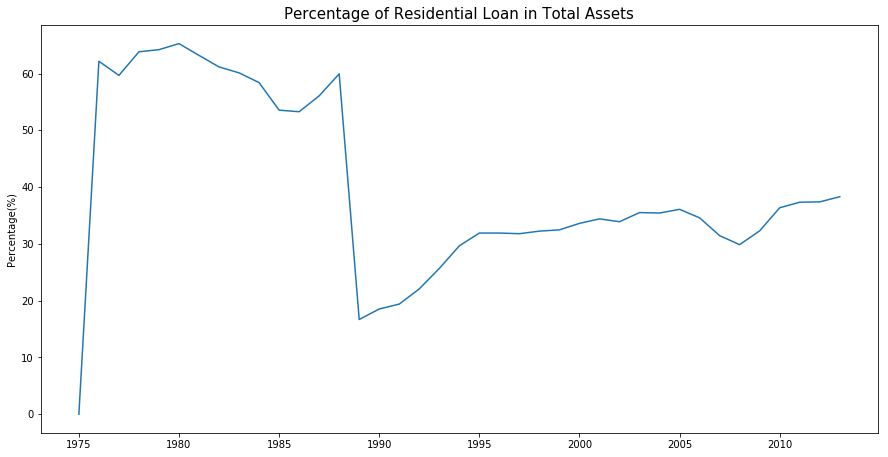

In [16]:
residential_loans, year_axis=percentage_among_years(1975,2013,'Resident assets – loans and advances – residential')
plt.plot(year_axis,residential_loans)
plt.ylabel("Percentage(%)")
plt.title("Percentage of Residential Loan in Total Assets", fontsize=15)
plt.show

This chart looks so weird, the firt half of the chart is not making any sense. This could be caused by the incompleteness of the record in the earlier years.

Let's get rid of the first half and plot again.

<function matplotlib.pyplot.show(*args, **kw)>

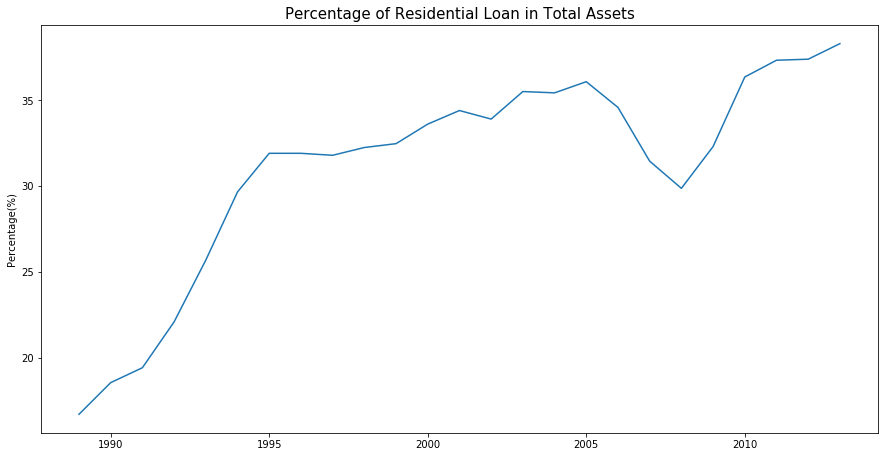

In [17]:
residential_loans, year_axis=percentage_among_years(1989,2013,'Resident assets – loans and advances – residential')
plt.plot(year_axis, residential_loans)
plt.ylabel("Percentage(%)")
plt.title("Percentage of Residential Loan in Total Assets", fontsize=15)
plt.show

Now, you can see the trending of reisdential loans which is **rising**.

This means that a larger scale of housing investment is taking place.

So is investing real estate a good choise?

Then let's see what happens to the **recievable bills** among the years.

<function matplotlib.pyplot.show(*args, **kw)>

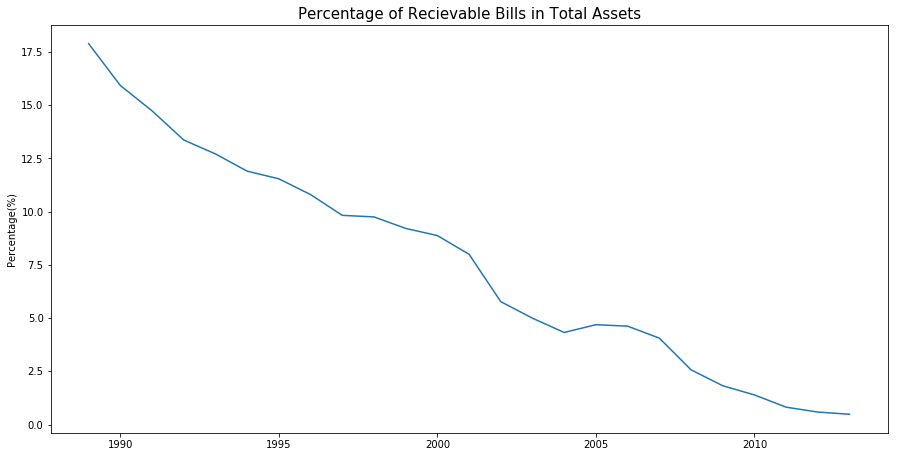

In [18]:
recievable_bills, year_axis=percentage_among_years(1989,2013,'Resident assets – bills receivables')
plt.plot(year_axis,recievable_bills)
plt.ylabel("Percentage(%)")
plt.title("Percentage of Recievable Bills in Total Assets", fontsize=15)
plt.show

This chart shows the proportion of **recievable bills** in the total assets is decreasing over the years.

Therefore, it could mean that the regular expenditures account for a lower proportion of household expenditures.

As a result, the life quality of Australian people is increasing!

Finally, let's see what happens to the **personal loans** among these years.

<function matplotlib.pyplot.show(*args, **kw)>

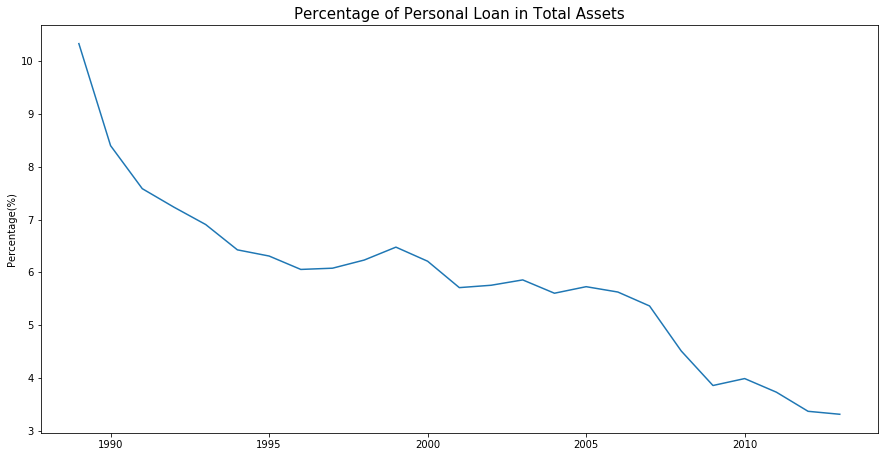

In [19]:
personal_loans, year_axis=percentage_among_years(1989,2013,'Resident assets – loans and advances – personal')
plt.plot(year_axis,personal_loans)
plt.ylabel("Percentage(%)")
plt.title("Percentage of Personal Loan in Total Assets", fontsize=15)
plt.show

This chart shows that the proportion of **personal loan** accounts for a lower proportion of total assets over the recent decades.

This means that Australian people can afford consumption and pay it once and for all without taking loans.

Once again, it proves the life quality is increasing in Australia.

## Conclusion

1. Investing in real estate might be a profitable option (refers to the supply and demand relationship)


2. The life quality of Australian people is increasing